# Total COVID-19 daily cases
Script produced by [Laurent Lessard](https://laurentlessard.com)

---

### Import data from JHU CSSE

In [11]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

mpl.rcParams['figure.dpi'] = 120

# get country data
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df_raw = pd.read_csv(url)

# get country populations
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv"
df_pop = pd.read_csv(url, index_col="Combined_Key", usecols=["Combined_Key", "Population"]).Population

### Reformat data into convenient form

In [2]:
colnames = df_raw.columns

# aggregate by region
df = df_raw.pivot_table(index='Country/Region',values=colnames[4:],aggfunc=sum)

# make countries columns rather than rows
df = df.T

# make the index a datetime object
df = df.reindex( pd.to_datetime(df.index) )

# sort the dates/times
df.sort_index(inplace=True)

# record the latest date
latest_date = df.index[-1].strftime("%a %b %d, %Y")
print(latest_date)

Wed Jul 29, 2020


### List of countries with the most confirmed cases

In [3]:
cases_total = df.max() * 1.0
for name,cases in cases_total.items():
    cases_total[name] /= df_pop[name]
cases_sorted = cases_total.sort_values(ascending=False)
cases_sorted.head(15)

Country/Region
Qatar         0.038233
Bahrain       0.023690
San Marino    0.020596
Chile         0.018391
Kuwait        0.015432
Oman          0.015386
Holy See      0.014833
Panama        0.014663
US            0.013437
Armenia       0.012803
Peru          0.012152
Brazil        0.012007
Andorra       0.011881
Luxembourg    0.010437
Singapore     0.008808
dtype: float64

### List of countries with the most daily cases

In [4]:
daily_cases_total = df.diff().max() * 1.0
for name,cases in daily_cases_total.items():
    daily_cases_total[name] /= df_pop[name]
daily_cases_sorted = daily_cases_total.sort_values(ascending=False)
daily_cases_sorted.head(20)

Country/Region
Holy See                 0.003708
Kyrgyzstan               0.001763
San Marino               0.001591
Montenegro               0.001080
Andorra                  0.001022
Kazakhstan               0.000999
Qatar                    0.000817
Equatorial Guinea        0.000763
Chile                    0.000732
Sao Tome and Principe    0.000689
Ecuador                  0.000654
Liechtenstein            0.000551
Seychelles               0.000508
Bahrain                  0.000462
Oman                     0.000424
Peru                     0.000417
France                   0.000411
Antigua and Barbuda      0.000398
Luxembourg               0.000374
Panama                   0.000357
dtype: float64

In [5]:
# Country group for European Union
idx_EUK = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark",
          "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland",
          "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland",
          "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden", "United Kingdom"]
df["EU + UK"] = df[idx_EUK].sum(axis="columns")
df_pop["EU + UK"] = df_pop[idx_EUK].sum()


# Country group for South America
idx_SA = ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
          "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"]
df["South America"] = df[idx_SA].sum(axis="columns")
df_pop["South America"] = df_pop[idx_SA].sum()

### Plot daily confirmed cases

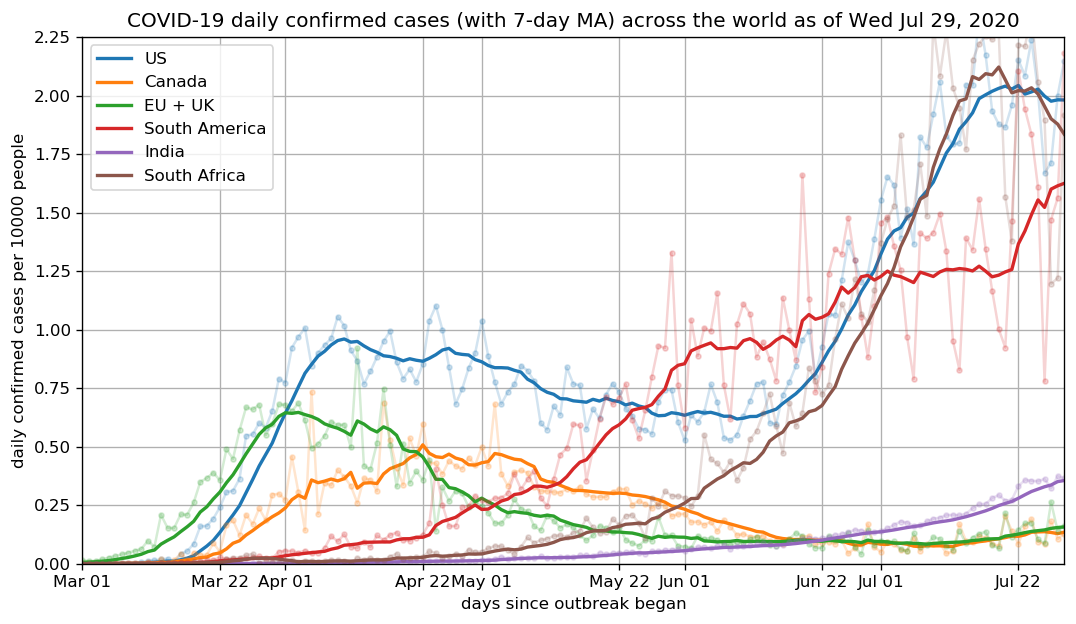

In [7]:
plt.figure(figsize=(9,5))
ax = plt.gca()

# selected countries
countries = ['US','Canada','EU + UK','South America', 'India', 'South Africa']
# countries = cases_sorted[:6].index
min_cases = 1
pop_scale = 10000

# shift data so that index corresponds to days since min_cases cases.
# shifted_data = shift_data( countries, min_cases )
# data_len = max([len(dat) for dat in shifted_data])

# xmax = data_len

for name in countries:
    data = df[name]
    color = next(ax._get_lines.prop_cycler)['color']
    population = df_pop[name]
    plt.plot( data.diff() / population * pop_scale, marker=".", label=None, color=color, alpha=0.2 )
    plt.plot( data.diff().rolling(7).mean() / population * pop_scale, marker="", label=name, color=color, linewidth=2 )

# make plot
ax.set_title("COVID-19 daily confirmed cases (with 7-day MA) across the world as of %s" % latest_date)
ax.legend(loc="upper left")
ax.set_xlabel("days since outbreak began" )
ax.set_ylabel(f"daily confirmed cases per {pop_scale} people")
ax.grid()

date_format = "%b %d"
ax.xaxis.set_major_formatter(DateFormatter(date_format))
ax.autoscale(enable=True, axis='x', tight=True)
date_start = datetime.date(2020, 3, 1)
# date_end   = datetime.date(2020, 10, 1)
plt.xlim(xmin=date_start)

plt.ylim(ymin=0,ymax=2.25)    
plt.tight_layout(pad=0)

plt.savefig("figures/world_daily_cases.png")

Combined_Key
Afghanistan                38928341.0
Albania                     2877800.0
Algeria                    43851043.0
Andorra                       77265.0
Angola                     32866268.0
                              ...    
Sweetwater, Wyoming, US       42343.0
Teton, Wyoming, US            23464.0
Uinta, Wyoming, US            20226.0
Washakie, Wyoming, US          7805.0
Weston, Wyoming, US            6927.0
Name: Population, Length: 4153, dtype: float64

In [19]:
df.diff().rolling(7).mean().iloc[-1] 

Country/Region
Afghanistan        106.285714
Albania            106.714286
Algeria            622.428571
Andorra              4.142857
Angola              38.000000
                     ...     
Yemen               10.142857
Zambia             238.000000
Zimbabwe           120.714286
EU + UK           8057.000000
South America    69939.142857
Name: 2020-07-29 00:00:00, Length: 190, dtype: float64

In [29]:
df[['Austria','Belgium']]

Country/Region,Austria,Belgium
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0
...,...,...
2020-07-25,20338,65727
2020-07-26,20472,66026
2020-07-27,20558,66428
2020-07-28,20677,66662


In [ ]:
interesting = ['Austria','Belgium','Canada','Denmark','France','Germany','Ireland','Italy',
               'Netherlands','Norway','Spain','United Kingdom','Iran','Portugal','Sweden',
               'US','Argentina','Bolivia','Brazil','Chile','Colombia','India','Mexico','South Africa']

data_normalized = df[interesting].diff().rolling(7).mean().iloc[-1] / df_pop[interesting]
country_order = data_normalized.sort_values().index


fig,axs = plt.subplots(3,8, figsize=(12,4), sharey=True, sharex=True)

pop_scale = 10000

for ix,name in enumerate(country_order):
    if ix < 8:
        col = "C2"
    elif ix < 16:
        col = "C1"
    else:
        col = "C3"
    ax = axs.reshape(-1)[ix]
    data = df[name]
    population = df_pop[name]
    ax.fill_between( x=data.index, y1=data.diff().rolling(7).mean() / population * pop_scale, alpha=0.5, color=col )
    ax.plot( data.diff().rolling(7).mean() / population * pop_scale, label=name, linewidth=2, color=col )
    txt = ax.text(.5,.85, name,
            horizontalalignment='center',
            transform=ax.transAxes,
            fontsize=11)
    ax.grid()
    date_format = "%b %d"
    ax.xaxis.set_major_formatter(DateFormatter(date_format))
    ax.autoscale(enable=True, axis='x', tight=True)
    date_start = datetime.date(2020, 3, 3)
#     date_end   = datetime.date(2020, 7, 1)
    ax.set_xlim(xmin=date_start)
    
    months = mdates.MonthLocator()  # every month
    ax.xaxis.set_major_locator(months)
    
    ax.set_ylim(ymin=0,ymax=4.2)
    ax.set_yticks(range(5))

fig.autofmt_xdate(rotation=90, ha='center')
my_suptitle = fig.suptitle("Daily confirmed cases per 10,000 people (7-day MA sorted by most recent value)", fontsize=14, y=1.1)

plt.tight_layout(pad=0)
plt.savefig("figures/world_daily_cases_breakdown.png", dpi=fig.dpi, bbox_inches='tight', bbox_extra_artists=[my_suptitle])